<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week9_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 9***


**Fali Irham Maulana / 2341720121**

**TI - 3F / 11**

In [1]:
#Import Library

!pip install pytesseract
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.**

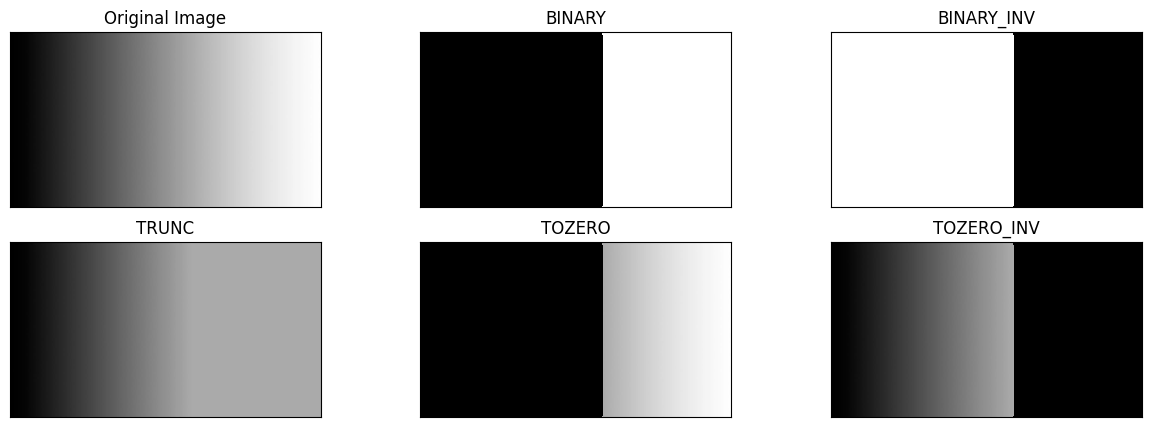

In [3]:
#Load Data
filename = ('/content/drive/MyDrive/PCVK25_3F_11/Gambar/gradient.jpg')
img = cv.imread(filename)

#Membuat Treshold
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)

thresh = 170 #Nilai Treshold

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1

#3. Threshold Truncate
thresh3[img>thresh] = thresh

#4. Threshold Tozero
thresh4[img<=thresh] = 0

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)**

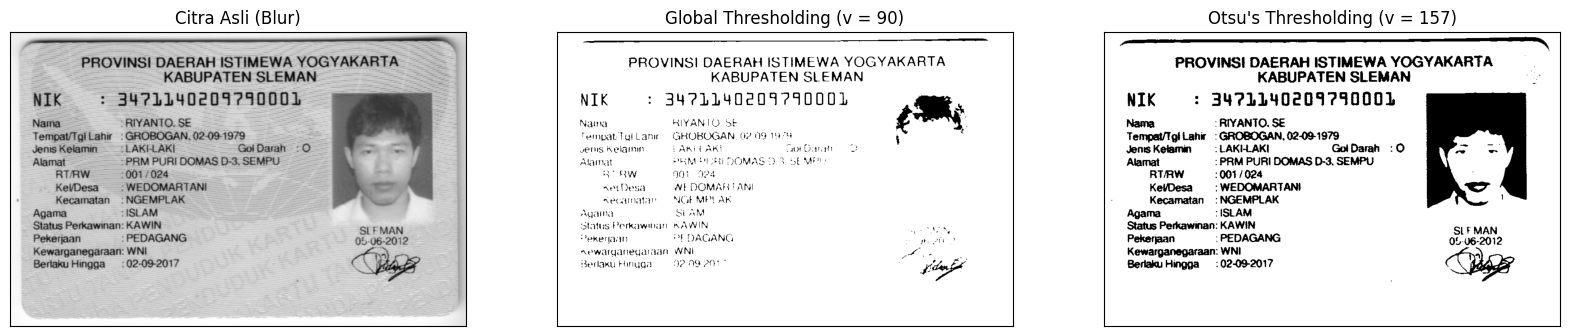

In [4]:
# Membaca gambar dalam grayscale
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename, 0)

# Menghaluskan citra untuk mengurangi noise
blur = cv.GaussianBlur(img, (5, 5), 0)

# Fungsi manual Otsu Thresholding
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number

    # Histogram citra
    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    # Perhitungan antar threshold
    for t in bins[1:-1]:
        t = int(t)
        pcb = np.sum(his[:t])  # jumlah piksel background
        pcf = np.sum(his[t:])  # jumlah piksel foreground

        if pcb == 0 or pcf == 0:
            continue

        Wb = pcb * mean_weight
        Wf = pcf * mean_weight

        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)

        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    # Membentuk citra biner akhir
    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0

    return final_img, final_thresh

# Memanggil fungsi Otsu
otsu_biner, otsu_thresh = otsu(blur)

# Menampilkan hasil
x = f"Otsu's Thresholding (v = {otsu_thresh})"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)

titles = ['Citra Asli (Blur)', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize=(20, 10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

**5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.**

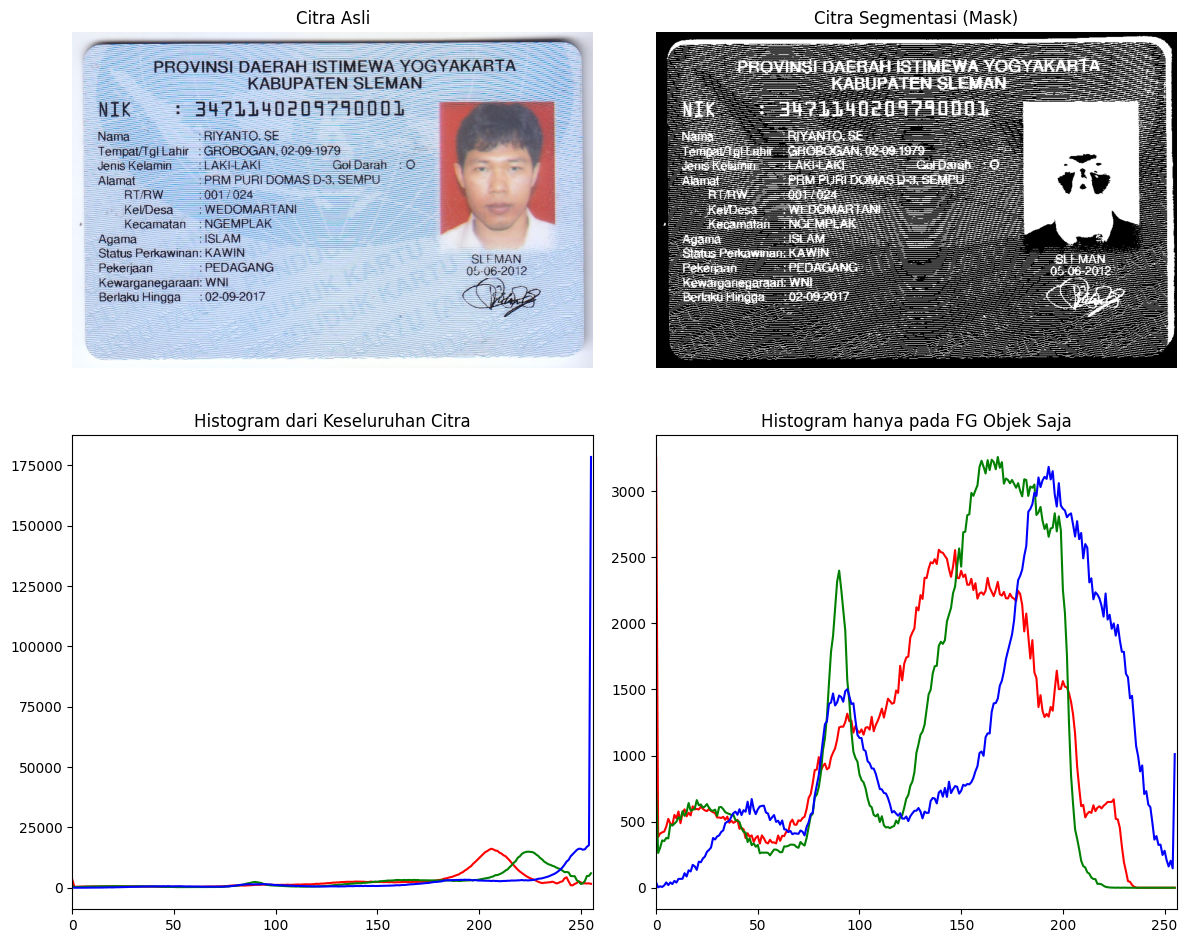

In [5]:
# Membaca gambar
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)

# Konversi warna dari BGR ke RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mengubah citra ke grayscale
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Membuat mask dengan thresholding (membalik hasil biner)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# Menampilkan citra asli dan hasil segmentasi
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi (Mask)')
plt.axis('off')

# Menampilkan histogram RGB keseluruhan & pada area objek (FG)
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    # Histogram seluruh citra
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3)
    plt.plot(hist0, color=col)
    plt.title('Histogram dari Keseluruhan Citra')
    plt.xlim([0, 256])

    # Histogram hanya pada bagian foreground (objek)
    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4)
    plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG Objek Saja')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

**6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja.**

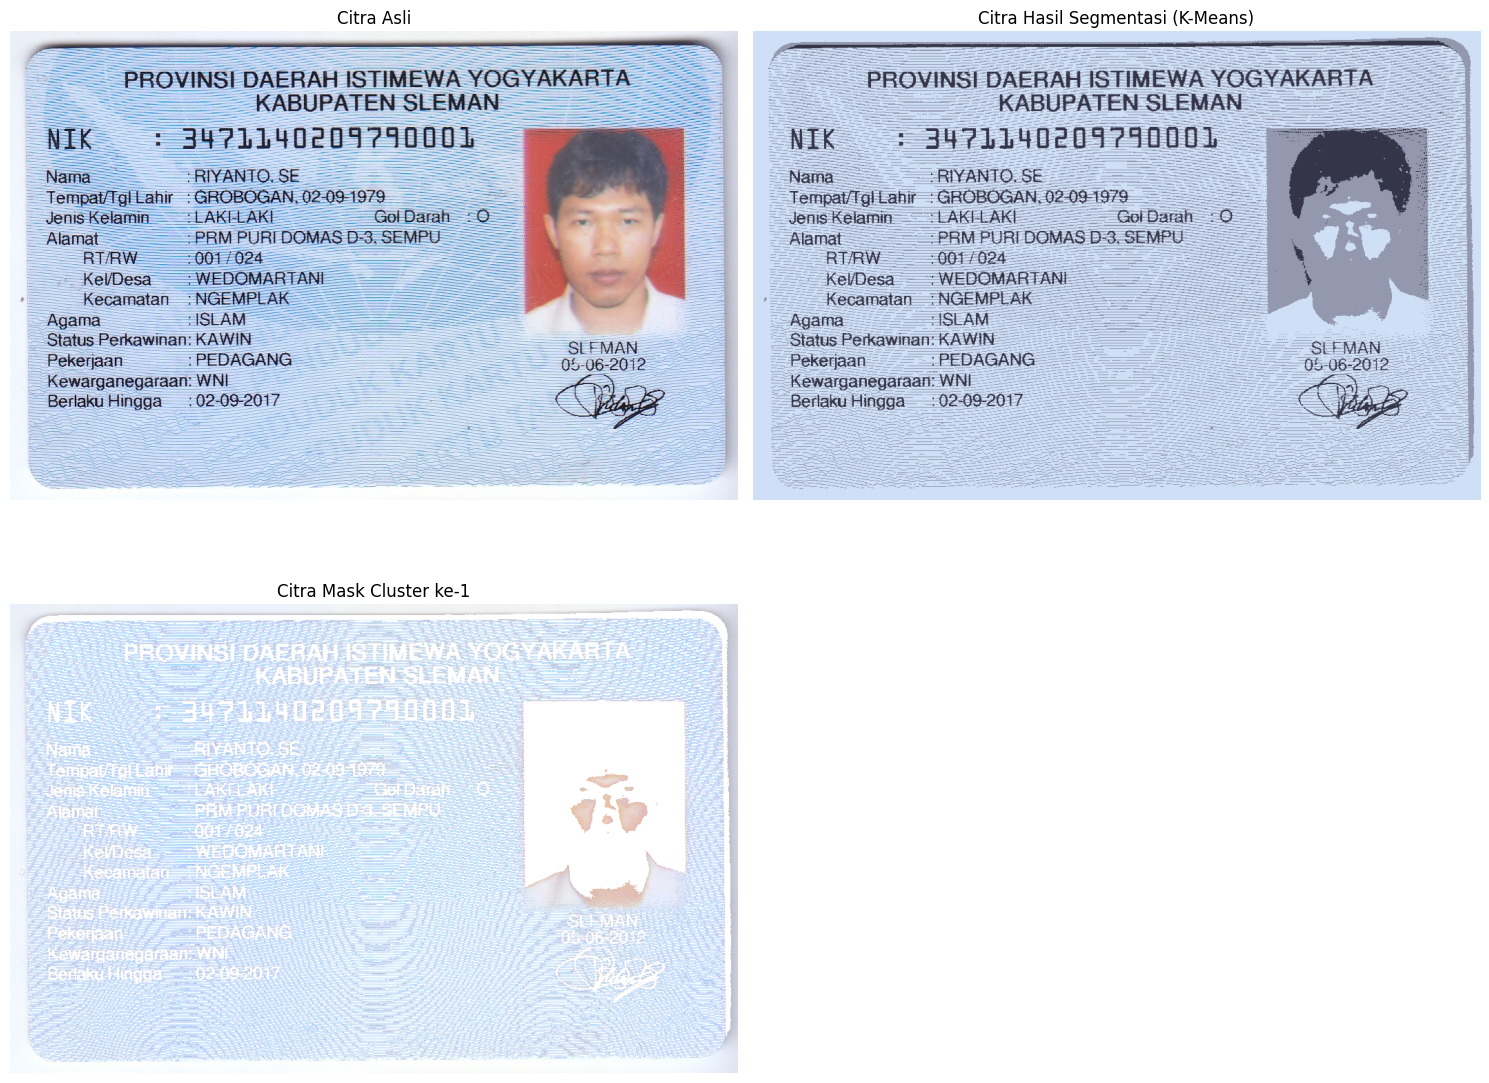

In [6]:
# Membaca citra
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

'''
Kita akan menggunakan fungsi cv.kmeans() yang membutuhkan array 2D sebagai input,
sedangkan image aslinya adalah array 3D.
Maka kita perlu melakukan flattening array gambar.
'''

# Reshape array ke bentuk 2D (setiap baris = 1 pixel, 3 kolom = R, G, B)
pixel_values = img.reshape((-1, 3))

# Konversi ke tipe float32 (syarat fungsi kmeans OpenCV)
pixel_values = np.float32(pixel_values)

'''
Kriteria berhenti (termination criteria):
Iterasi berhenti jika jumlah iterasi mencapai 150
atau perubahan posisi centroid < 0.1
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

'''
Jika diperhatikan pada image asli, terdapat beberapa warna dominan.
Untuk percobaan ini kita gunakan 3 cluster.
'''
k = 3

# Menjalankan algoritma K-Means
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Konversi titik centroid ke tipe integer (karena warna citra 0–255)
centers = np.uint8(centers)

# Flattening label array (1D)
labels = labels.flatten()

# Konversi setiap pixel ke warna centroid sesuai label cluster-nya
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

# Membuat salinan citra untuk masking
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))

# Contoh: hanya menampilkan cluster ke-1, cluster lain dibuat putih
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

# Menampilkan hasil
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(segmented_image)
plt.title('Citra Hasil Segmentasi (K-Means)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(masked_image0)
plt.title('Citra Mask Cluster ke-1')
plt.axis('off')

plt.tight_layout()
plt.show()


**7. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja.**

In [7]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 0s (1,182 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading data

In [8]:
# Fungsi untuk menampilkan citra
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

In [9]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


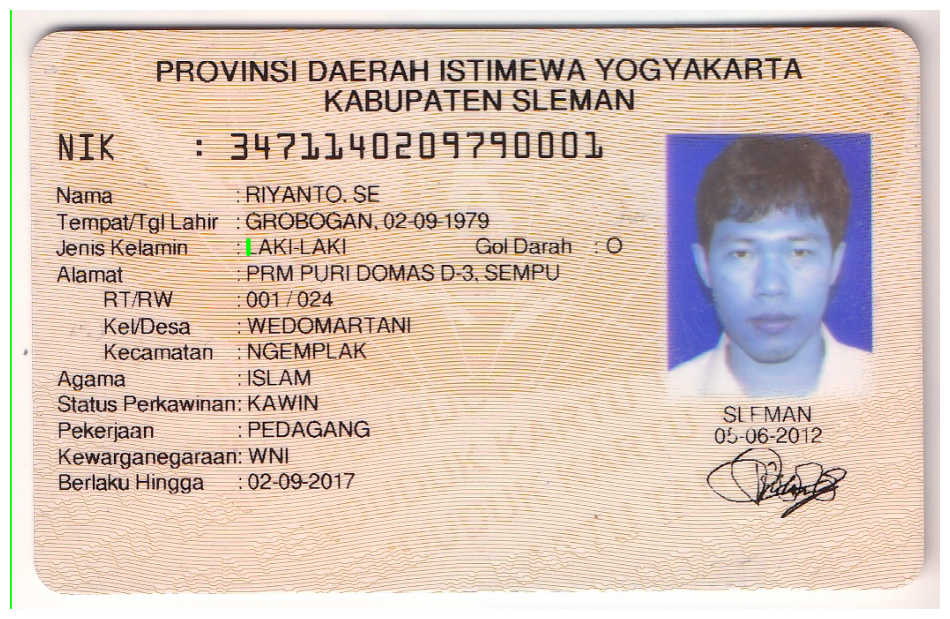

In [12]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



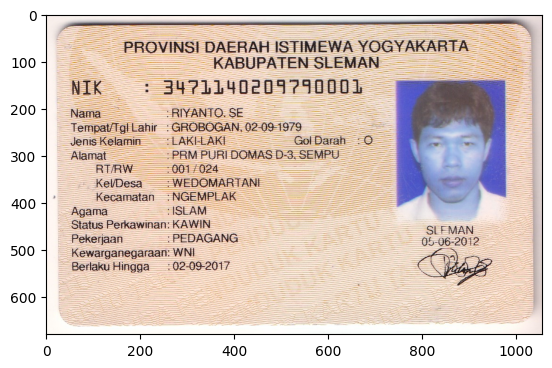

In [13]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png')
plt.imshow(img)

# Konversi ke grayscale untuk preprocessing tambahan
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Thresholding ringan untuk memperjelas teks
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)

# OCR pada hasil threshold
text_data = pytesseract.image_to_data(threshed, output_type='data.frame')
text_string = pytesseract.image_to_string(threshed, lang='ind')

print(text_string)

# Filter baris valid (confidence ≠ -1)
text_valid = text_data[text_data.conf != -1]

# Grouping teks per blok
lines = text_valid.groupby('block_num')['text'].apply(list)
conf = text_valid.groupby('block_num')['conf'].mean()

**8. Tugas berikutnya adalah mengimplementasikan hasil citra yang telah diproses dengan
GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat
pada KTP.**

1. Nilai Treshold 150

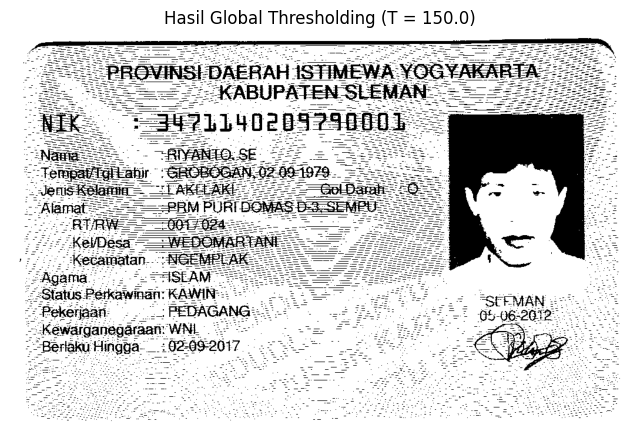

===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====

 



In [19]:
#1. Membaca dan menampilkan citra asli
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#2. Konversi ke Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#3. Global Thresholding
ret, global_thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY) #Nilai Tresholdnya = 150

plt.figure(figsize=(8, 6))
plt.imshow(global_thresh, cmap='gray')
plt.title(f'Hasil Global Thresholding (T = {ret})')
plt.axis('off')
plt.show()

# 4. OCR pada hasil thresholding
text = pytesseract.image_to_string(global_thresh, lang='ind')

print("===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====\n")
print(text)

#5. Menampilkan Bounding Box pada teks
data = pytesseract.image_to_data(global_thresh, output_type=Output.DICT)

n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # hanya tampilkan hasil OCR dengan kepercayaan tinggi
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img_rgb = cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

2. Nilai Treshold 125

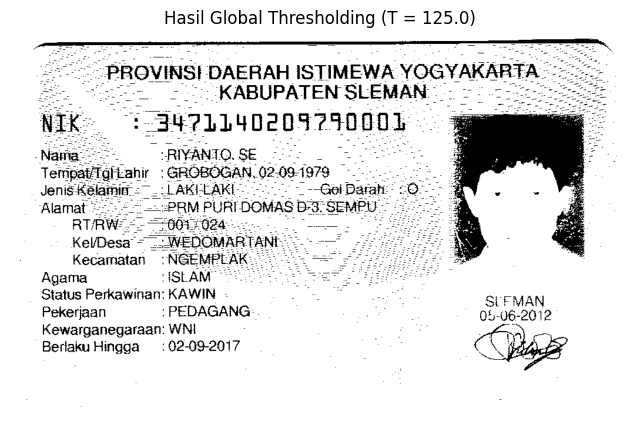

===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====

3 OVINSI: DAERAH ISTIMEWA YOGYAKAR A

 

Kecamatan :M K
Agama HISLAM
Status Perkawinan: KAWIN NN Li
Pekerjaan : PEDAGANG SLEMAN

05-06-2012
Kewarganegaraan: WNI S
Berlaku Hingga 02-09-2017 . aa

1,



In [20]:
#1. Membaca dan menampilkan citra asli
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#2. Konversi ke Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#3. Global Thresholding
ret, global_thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY) #Nilai Tresholdnya = 125

plt.figure(figsize=(8, 6))
plt.imshow(global_thresh, cmap='gray')
plt.title(f'Hasil Global Thresholding (T = {ret})')
plt.axis('off')
plt.show()

# 4. OCR pada hasil thresholding
text = pytesseract.image_to_string(global_thresh, lang='ind')

print("===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====\n")
print(text)

#5. Menampilkan Bounding Box pada teks
data = pytesseract.image_to_data(global_thresh, output_type=Output.DICT)

n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # hanya tampilkan hasil OCR dengan kepercayaan tinggi
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img_rgb = cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

3. Nilai Treshold 100

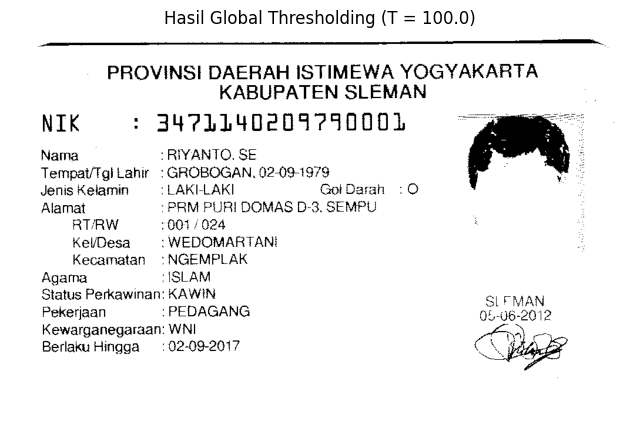

===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====

 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK 1 34711140204?740001

 

Nama :RIYANTO. SE

Tempat/Tgi Lahir : GROBOGAN, 02-09-1979

Jenis Kelamin : LAKI-LAKI GolDarah :0

Alamat : PRM PURI DOMAS D-3. SEMPU
RTRW 10011624

Kel/Desa : WEDOMARTAN!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Perkawinan: KAWIN

F
Pekerjaan : PEDAGANG SMAN,

Kewarganegaraan: WNI

Berlaku Hingga “02-09-2017 “TR 3

 



In [21]:
#1. Membaca dan menampilkan citra asli
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#2. Konversi ke Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#3. Global Thresholding
ret, global_thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY) #Nilai Tresholdnya = 100

plt.figure(figsize=(8, 6))
plt.imshow(global_thresh, cmap='gray')
plt.title(f'Hasil Global Thresholding (T = {ret})')
plt.axis('off')
plt.show()

# 4. OCR pada hasil thresholding
text = pytesseract.image_to_string(global_thresh, lang='ind')

print("===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====\n")
print(text)

#5. Menampilkan Bounding Box pada teks
data = pytesseract.image_to_data(global_thresh, output_type=Output.DICT)

n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # hanya tampilkan hasil OCR dengan kepercayaan tinggi
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img_rgb = cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

4. Nilai Treshold 80

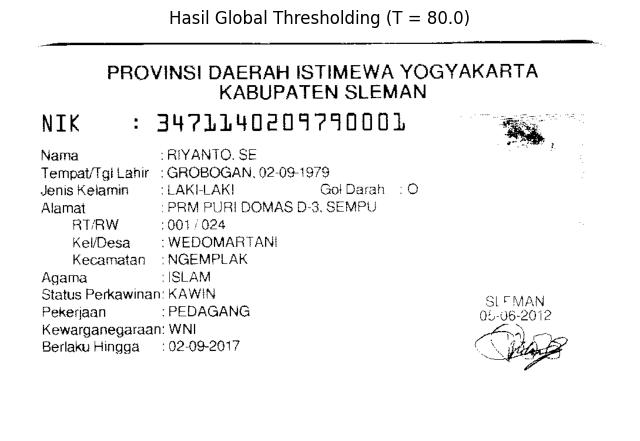

===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====

 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 347111402047 90001

Nama :RIYANTO. SE

Tempat/Tgi Lahir : GROBOGAN, 02-09-1979

Jenis Kelamin 2LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 / 624

Kel/Desa : WEDOMARTANI
Kecamatan : NGEMPLAK

Agama :ISLAM

Status Perkawinan: KAWIN SLFMAN
Pekerjaan : PEDAGANG 0262012
Kewarganegaraan: WNI “
Berlaku Hingga “02-09-2017 “Aa —

  



In [18]:
#1. Membaca dan menampilkan citra asli
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#2. Konversi ke Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#3. Global Thresholding
ret, global_thresh = cv.threshold(gray, 80, 255, cv.THRESH_BINARY) #Nilai Tresholdnya = 80

plt.figure(figsize=(8, 6))
plt.imshow(global_thresh, cmap='gray')
plt.title(f'Hasil Global Thresholding (T = {ret})')
plt.axis('off')
plt.show()

# 4. OCR pada hasil thresholding
text = pytesseract.image_to_string(global_thresh, lang='ind')

print("===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====\n")
print(text)

#5. Menampilkan Bounding Box pada teks
data = pytesseract.image_to_data(global_thresh, output_type=Output.DICT)

n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # hanya tampilkan hasil OCR dengan kepercayaan tinggi
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img_rgb = cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

5. Nilai Treshold 60

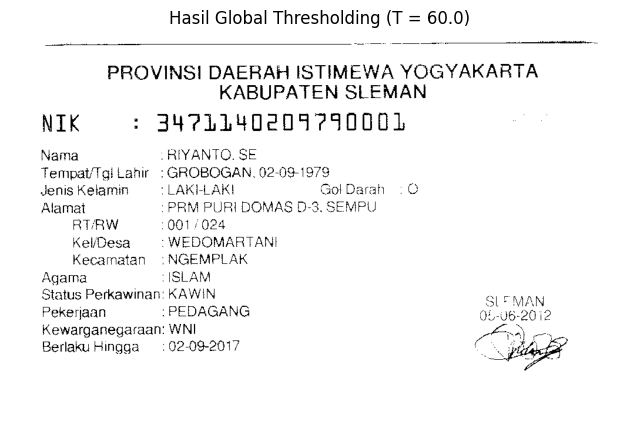

===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 34921400097 90001

Nama : RIYANTO. SE

Tempat/Tg! Lahir : GROBOGAN. 02-99-1979

Jenis Kelamin 1 LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 001 1024

KeliDesa : WEDOMARTANI
Kecamatan : NGEMPLAK

Agama ISLAM

Status Perkawinan: KAWIN SL MAN

Pekerjaan : PEDAGANG da E.2012
N

Kewarganegaraan: WNI
Berlaku Hingga :02-09-2017

 



In [22]:
#1. Membaca dan menampilkan citra asli
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#2. Konversi ke Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#3. Global Thresholding
ret, global_thresh = cv.threshold(gray, 60, 255, cv.THRESH_BINARY) #Nilai Tresholdnya = 60

plt.figure(figsize=(8, 6))
plt.imshow(global_thresh, cmap='gray')
plt.title(f'Hasil Global Thresholding (T = {ret})')
plt.axis('off')
plt.show()

# 4. OCR pada hasil thresholding
text = pytesseract.image_to_string(global_thresh, lang='ind')

print("===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====\n")
print(text)

#5. Menampilkan Bounding Box pada teks
data = pytesseract.image_to_data(global_thresh, output_type=Output.DICT)

n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # hanya tampilkan hasil OCR dengan kepercayaan tinggi
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img_rgb = cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

6. Nilai Treshold 50

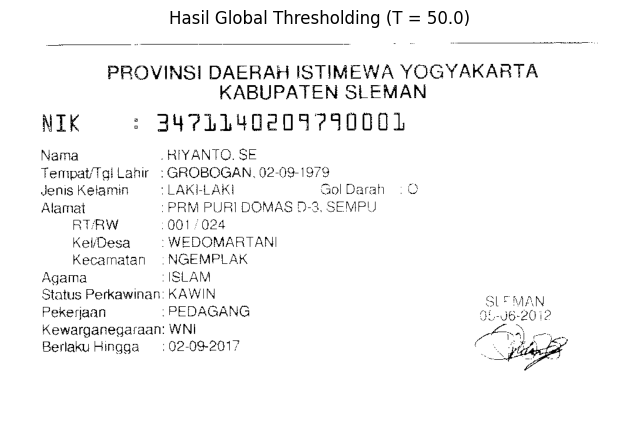

===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====

 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 34?2140204790801

Nama . RIYANTO. SE

Tempat/Tg! Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin 1 LAKI-LAKI Sol Darah : 0

Alamat PRM PURI DOMAS D-3, SEMPU
RT:RW 001 024

KelDesa : WEDOMARTANI
Kecamatan : NGEMPLAK

Agama ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG

Kewarganegaraan: WNI
Berlaku Hingga :092-09-2017

 



In [23]:
#1. Membaca dan menampilkan citra asli
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#2. Konversi ke Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#3. Global Thresholding
ret, global_thresh = cv.threshold(gray, 50, 255, cv.THRESH_BINARY) #Nilai Tresholdnya = 50

plt.figure(figsize=(8, 6))
plt.imshow(global_thresh, cmap='gray')
plt.title(f'Hasil Global Thresholding (T = {ret})')
plt.axis('off')
plt.show()

# 4. OCR pada hasil thresholding
text = pytesseract.image_to_string(global_thresh, lang='ind')

print("===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====\n")
print(text)

#5. Menampilkan Bounding Box pada teks
data = pytesseract.image_to_data(global_thresh, output_type=Output.DICT)

n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # hanya tampilkan hasil OCR dengan kepercayaan tinggi
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img_rgb = cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

7. Nilai Treshold 30

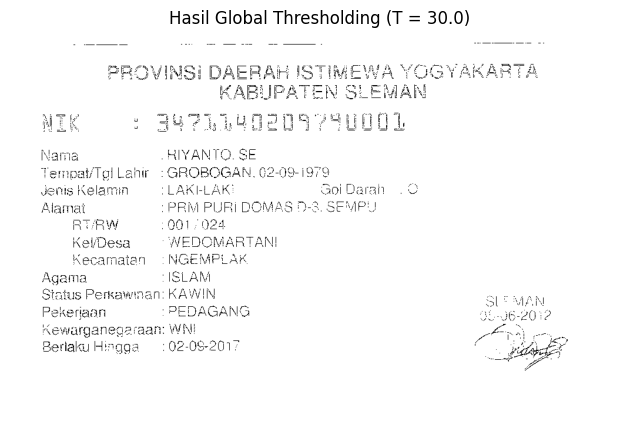

===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====

   

 

Je elamin

Alamat
RTRW
Kel

  
 

Ke atan
Agama
Status Perka
Pererjaan
Kewargangg

    

 

Beriaku H

 

RIYANTO. SE
GROBOGAN.
LAKI-LAKI
PRM PURI DOMAS 5
901 024
MEDCMARTAN!
NGEMPLAK
ISLAM

KAWIN
PEDAGANG

   

G

 

1 WNE

02-08-2017

oi979

Sol Darah. 0
EP.

 

 



In [24]:
#1. Membaca dan menampilkan citra asli
filename = '/content/drive/MyDrive/PCVK25_3F_11/Gambar/ktp.png'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#2. Konversi ke Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#3. Global Thresholding
ret, global_thresh = cv.threshold(gray, 30, 255, cv.THRESH_BINARY) #Nilai Tresholdnya = 30

plt.figure(figsize=(8, 6))
plt.imshow(global_thresh, cmap='gray')
plt.title(f'Hasil Global Thresholding (T = {ret})')
plt.axis('off')
plt.show()

# 4. OCR pada hasil thresholding
text = pytesseract.image_to_string(global_thresh, lang='ind')

print("===== HASIL TEKS DARI KTP (SETELAH GLOBAL THRESHOLDING) =====\n")
print(text)

#5. Menampilkan Bounding Box pada teks
data = pytesseract.image_to_data(global_thresh, output_type=Output.DICT)

n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # hanya tampilkan hasil OCR dengan kepercayaan tinggi
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img_rgb = cv.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

**Hasil dari percobaan yang dilakukan dengan menggunakan global thresholding dan proses ocr adalah hasil yang baik dan mendekati benar adalah ketika nilai thresholdingnya 50 dari percobaan nilai 150 hingga 30, dari percobaan tadi bisa disimpulkan tidak selalu nilai thresholding yang rendah dalam kasus ini tidak tentu selalu baik karena pada nilai 30 hasilnya malah lebih tidak jelas dan tidak semua hasil teks terbaca dengan jelas**